In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from tensorflow import Tensor
from keras.models import Model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

from numpy import expand_dims
from tensorflow.keras.utils import plot_model

from gram import gram_matrix

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print(tf.config.list_physical_devices('GPU'))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10326883768219387426
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4326490112
locality {
  bus_id: 1
  links {
  }
}
incarnation: 791202694295303331
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-11-07 14:59:56.254098: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 14:59:56.348571: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 14:59:56.394519: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 14:59:56.395012: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [2]:
vgg19 = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
vgg19.summary()

2022-11-07 14:48:25.961517: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 14:48:26.011329: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/cuda/targets/x86_64-linux/lib
2022-11-07 14:48:26.011364: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-11-07 14:48:26.015185: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is opti

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
conv = [2, 5, 9, 13, 17]
outputs = [vgg19.layers[i + 1].output for i in conv]
model = Model(inputs=vgg19.inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
img = load_img('night_vangogh.png', target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
input = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(input)

In [ ]:
def plot_features_map(features_map):
    # plot the output from each block
    height = 2
    width = 2

    for map in feature_maps:
        # plot all 64 maps in an 8x8 squares
        place = 1
        for _ in range(height):
            for _ in range(width):
                # specify subplot and turn of axis
                ax = plt.subplot(height, width, place)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(map[0, :, :, place-1])
                place += 1
        # show the figure
        plt.show()

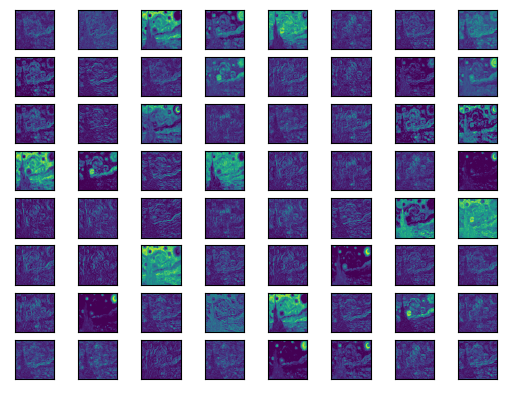

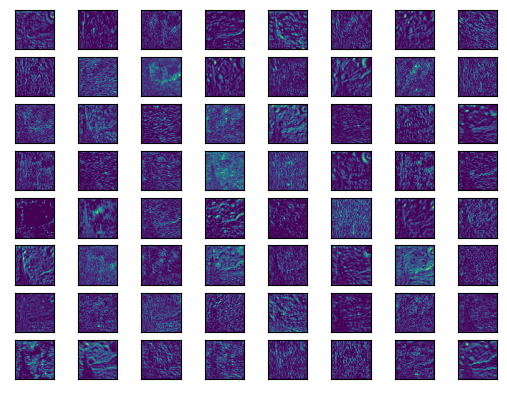

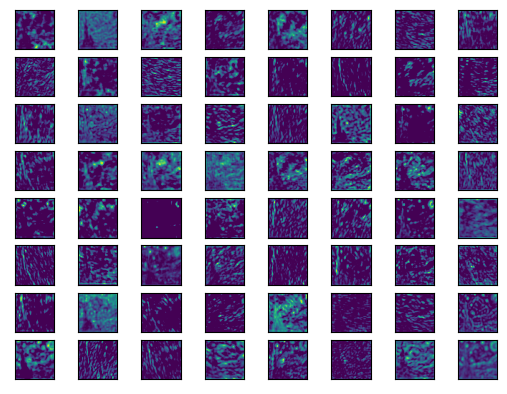

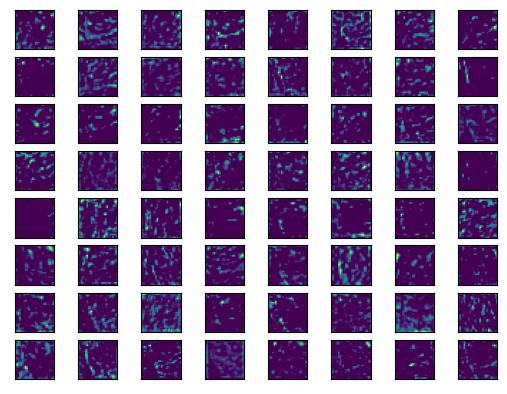

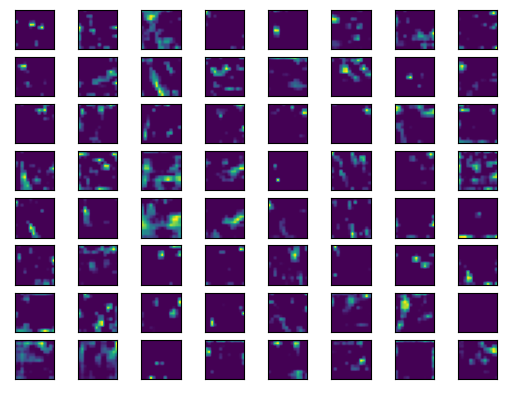

In [16]:
# plot the output from each block
height = 8
width = 8

for map in feature_maps:
   # plot all 64 maps in an 8x8 squares
   place = 1
   for _ in range(height):
      for _ in range(width):
         # specify subplot and turn of axis
         ax = plt.subplot(height, width, place)
         ax.set_xticks([])
         ax.set_yticks([])
         # plot filter channel in grayscale
         plt.imshow(map[0, :, :, place-1])
         place += 1
   # show the figure
   plt.show()

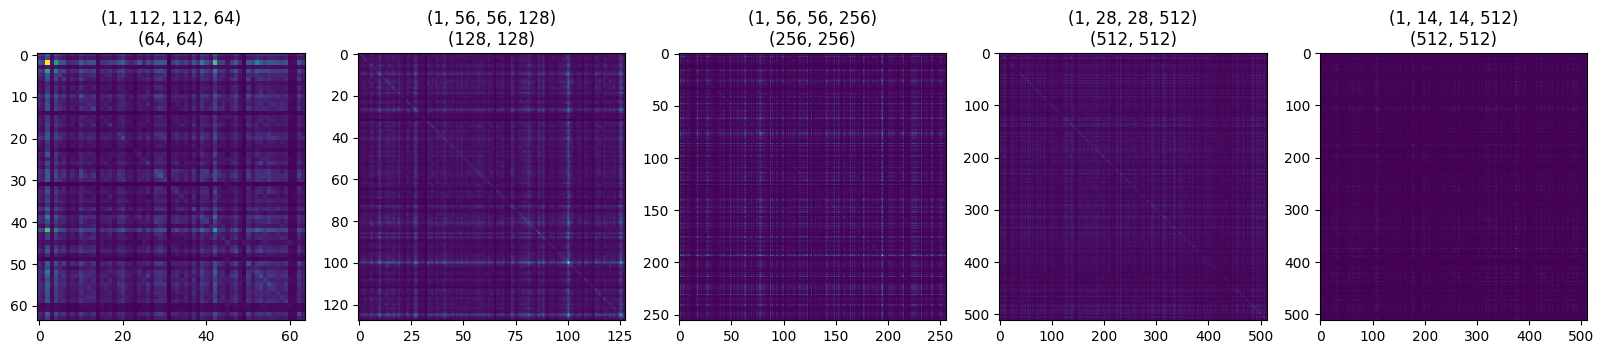

In [34]:

figs, axs = plt.subplots(1, 5,figsize=(20, 10))
i = 0
for map in feature_maps:

   G = gram_matrix(map)
   axs[i].imshow(G)
   axs[i].set_title(f'{map.shape}\n{G.shape}')
   i += 1
